In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# reload automatically modules 
%load_ext autoreload
%autoreload 2


In [7]:
import string
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
import nltk


nlp = spacy.load('fr_core_news_md')
nltk.download('punkt')
nltk.download('stopwords')

def cleanse_french_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # perform lemmatisation
    doc = nlp(text)
    text = ' '.join([token.lemma_ for token in doc])
    
    # Remove stopwords
    words = text.split()
    cleaned_words = [word for word in words if word not in fr_stop]
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

df = pd.read_csv('../data/esg_fr_classification.csv')

df['text'] = df['text'].apply(cleanse_french_text)

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azeem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azeem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,esg_category
0,niveau dioxyde carbone intérieur pouvoir risqu...,environnemental
1,prix lélectricité déroutant sanglant cest luti...,environnemental
2,migration masse nest crise cest normal mesure ...,environnemental
3,rupture climat arriver royaumeuni besoin dune ...,environnemental
4,changement climatique forcer oiseau monde pote...,environnemental


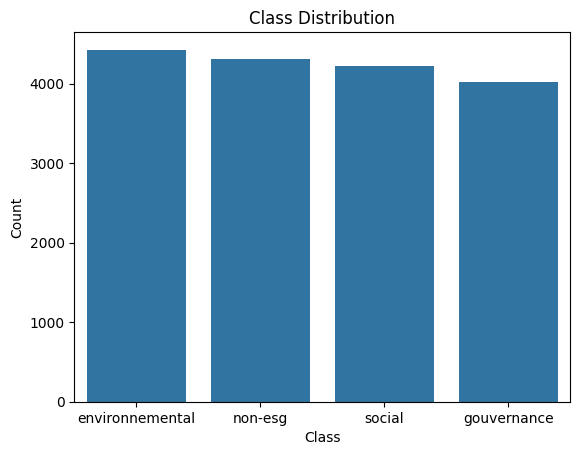

In [8]:
class_counts = df['esg_category'].value_counts()

sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [10]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import spacy

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('french'))  


def get_most_common_words(texts, n=20):
    word_list = []
    for text in texts:
        words = word_tokenize(text.lower())
        words = [word for word in words if word.isalpha() and word not in stop_words]
        word_list.extend(words)
    return Counter(word_list).most_common(n)

# For each class, get the most common words
for label in df['esg_category'].unique():
    texts = df[df['esg_category'] == label]['text']  # Assuming you have a 'text' column
    common_words = get_most_common_words(texts)
    print(f"Most common words in {label}: {common_words}\n")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azeem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azeem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common words in environnemental: [('climatique', 5313), ('changement', 3507), ('déclarer', 3196), ('pouvoir', 2732), ('faire', 1959), ('devoir', 1750), ('pollution', 1746), ('grand', 1477), ('mondial', 1467), ('plastique', 1331), ('émission', 1312), ('monde', 1310), ('gouvernement', 1306), ('royaumeuni', 1183), ('climat', 1180), ('contre', 1128), ('pays', 1070), ('dernier', 1066), ('année', 1041), ('carbone', 972)]

Most common words in gouvernance: [('fiscal', 3791), ('déclarer', 2781), ('société', 2416), ('entreprise', 2229), ('livre', 2135), ('pouvoir', 2057), ('million', 2026), ('sterling', 1939), ('faire', 1915), ('devoir', 1746), ('quil', 1439), ('payer', 1350), ('grand', 1329), ('milliard', 1304), ('britannique', 1266), ('dernier', 1193), ('contre', 1136), ('directeur', 1088), ('actionnaire', 1012), ('rémunération', 996)]

Most common words in social: [('déclarer', 2893), ('femme', 2675), ('pouvoir', 2284), ('faire', 2157), ('travail', 1905), ('droit', 1830), ('devoir', 163

In [13]:
from nltk import ngrams

def get_most_common_ngrams(texts, n=2, num=20):
    ngram_list = []
    for text in texts:
        n_grams = ngrams(word_tokenize(text.lower()), n)
        ngram_list.extend([' '.join(grams) for grams in n_grams])
    return Counter(ngram_list).most_common(num)

# For each class, get the most common bi-grams
for label in df['esg_category'].unique():
    texts = df[df['esg_category'] == label]['text']
    common_ngrams = get_most_common_ngrams(texts, 2)
    print(f"Most common bi-grams in {label}: {common_ngrams} \n")


Most common bi-grams in environnemental: [('changement climatique', 3214), ('combustible fossile', 676), ('pollution atmosphérique', 636), ('crise climatique', 506), ('lutter contre', 441), ('pollution lair', 435), ('déclarer «', 387), ('réchauffement climatique', 361), ('livre sterling', 332), ('énergie renouvelable', 305), ('gaz serre', 301), ('atil déclarer', 295), ('contre changement', 262), ('milliard dollar', 258), ('qualité lair', 216), ('réduire émission', 214), ('lannée dernier', 213), ('» déclarer', 210), ('émission carbone', 200), ('déclarer quil', 194)] 

Most common bi-grams in gouvernance: [('livre sterling', 1937), ('million livre', 1349), ('milliard livre', 669), ('lévasion fiscal', 642), ('directeur général', 574), ('paradis fiscal', 491), ('conseil dadministration', 460), ('milliard dollar', 458), ('million dollar', 398), ('lannée dernier', 383), ('gouvernance dentrepris', 299), ('000 £', 299), ('faire face', 288), ('déclarer «', 286), ('déclarer quil', 284), ('dévasi

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_result = tfidf.fit_transform(df['text']).toarray()

tfidf_df = pd.DataFrame(tfidf_result, columns=tfidf.get_feature_names_out())
tfidf_df['esg_category'] = df['esg_category']  # Add the label column to the DataFrame

# Get the highest TF-IDF features for each class
for label in df['esg_category'].unique():
    print(f"Top TF-IDF words for {label}:")
    temp_df = tfidf_df[tfidf_df['esg_category'] == label]
    means = temp_df.drop('esg_category', axis=1).mean(axis=0).sort_values(ascending=False)
    print(means.head(10))


Top TF-IDF words for environnemental:
climatique    0.102064
changement    0.067170
pollution     0.040328
déclarer      0.034803
pouvoir       0.034064
plastique     0.033939
émission      0.029515
climat        0.028676
mondial       0.028612
faire         0.025326
dtype: float64
Top TF-IDF words for gouvernance:
fiscal         0.085454
société        0.047018
entreprise     0.045516
livre          0.041027
sterling       0.039488
million        0.038722
déclarer       0.033793
payer          0.030386
pouvoir        0.029024
actionnaire    0.028956
dtype: float64
Top TF-IDF words for social:
femme          0.057565
travail        0.040078
droit          0.039819
déclarer       0.034720
travailleur    0.032127
pouvoir        0.031772
faire          0.030878
noir           0.030413
devoir         0.025287
homme          0.024206
dtype: float64
Top TF-IDF words for non-esg:
déclarer    0.035389
pouvoir     0.035168
faire       0.034401
quil        0.025319
devoir      0.021246
dernier  

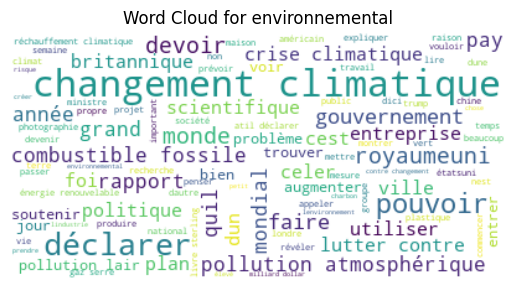

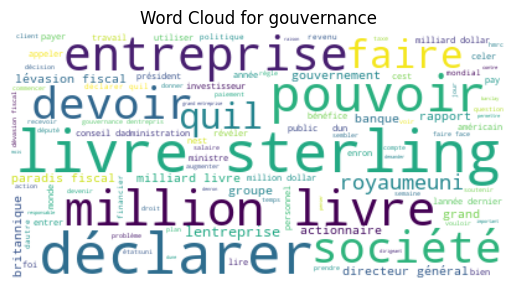

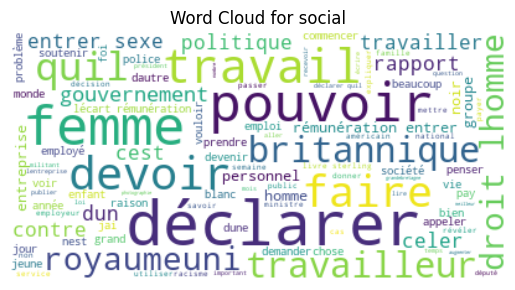

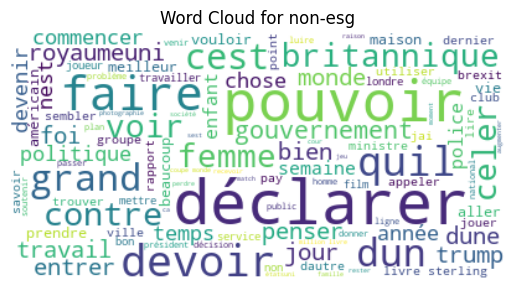

In [17]:
from wordcloud import WordCloud

for label in df['esg_category'].unique():
    texts = df[df['esg_category'] == label]['text'].str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texts)
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {label}")
    plt.show()
